<a href="https://colab.research.google.com/github/Patriciangugi/dsc-sampling-statistics-lab/blob/master/Sampling_Statistics_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import itertools

In [5]:
pumpkin_names = ['A', 'B', 'C', 'D', 'E', 'F']
weights = [19, 14, 15, 9, 10, 17]

pumpkin_dict = dict(zip(pumpkin_names, weights))

print(pumpkin_dict)


{'A': 19, 'B': 14, 'C': 15, 'D': 9, 'E': 10, 'F': 17}


The mean weight of the pumpkins is: 14.0


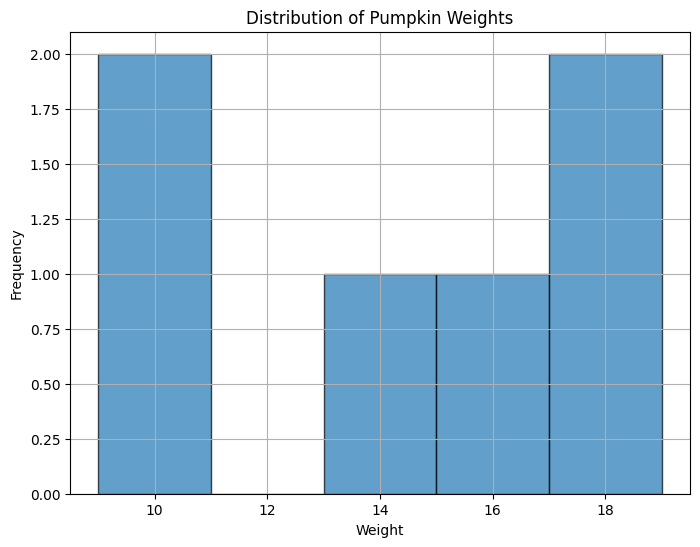

In [6]:
def calculate_mu(pumpkin_dict):
    weights = list(pumpkin_dict.values())
    d = sum(weights) / len(weights)
    return d

mu = calculate_mu(pumpkin_dict)
print(f"The mean weight of the pumpkins is: {mu}")

weights = list(pumpkin_dict.values())

plt.figure(figsize=(8, 6))
plt.hist(weights, bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Pumpkin Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

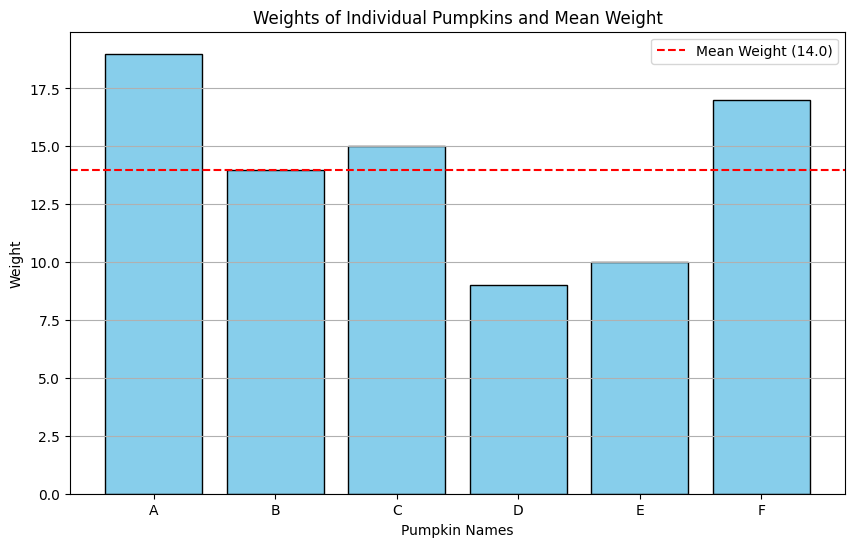

In [7]:
plt.figure(figsize=(10, 6))
bars = plt.bar(pumpkin_names, weights, color='skyblue', edgecolor='black')

plt.axhline(y=mu, color='r', linestyle='--', label=f'Mean Weight ({mu:.1f})')

plt.xlabel('Pumpkin Names')
plt.ylabel('Weight')
plt.title('Weights of Individual Pumpkins and Mean Weight')
plt.legend()
plt.grid(axis='y')

plt.show()

In [8]:
def calculate_sample_means(pumpkin_dict, sample_size):
    pumpkin_names = list(pumpkin_dict.keys())
    weights = np.array(list(pumpkin_dict.values()))

    combinations = list(itertools.combinations(pumpkin_names, sample_size))

    sample_means = []
    for comb in combinations:
        sample_weights = weights[[pumpkin_names.index(name) for name in comb]]
        sample_mean = np.mean(sample_weights)
        sample_means.append(sample_mean)

    return combinations, sample_means

n = 2

combinations, sample_means = calculate_sample_means(pumpkin_dict, n)

print(f"All possible combinations of {n} pumpkins: {combinations}")
print(f"Sample means for these combinations: {sample_means}")

All possible combinations of 2 pumpkins: [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F'), ('E', 'F')]
Sample means for these combinations: [16.5, 17.0, 14.0, 14.5, 18.0, 14.5, 11.5, 12.0, 15.5, 12.0, 12.5, 16.0, 9.5, 13.0, 13.5]


In [9]:
def sample_means(sample_size, data):

    pumpkin_names = list(data.keys())
    weights = np.array(list(data.values()))

    mu = np.mean(weights)

    combs = list(itertools.combinations(pumpkin_names, sample_size))

    x_bar_list = []

    for comb in combs:
        sample_weights = weights[[pumpkin_names.index(name) for name in comb]]
        sample_mean = np.mean(sample_weights)
        x_bar_list.append(sample_mean)

    return combs, x_bar_list, mu

# Sample size
n = 2

# Sample means and combinations
combs, means, mu = sample_means(n, pumpkin_dict)

# Print the results
print(f"Mean of population is: {mu:.1f}")
print(f"Sample size: {n}")
print(f"Combinations and their means:")
for comb, mean in zip(combs, means):
    print(f"{comb} -> {mean:.1f}")
print(f"The mean of all sample means mu_x_hat is: {np.mean(means):.1f}")

Mean of population is: 14.0
Sample size: 2
Combinations and their means:
('A', 'B') -> 16.5
('A', 'C') -> 17.0
('A', 'D') -> 14.0
('A', 'E') -> 14.5
('A', 'F') -> 18.0
('B', 'C') -> 14.5
('B', 'D') -> 11.5
('B', 'E') -> 12.0
('B', 'F') -> 15.5
('C', 'D') -> 12.0
('C', 'E') -> 12.5
('C', 'F') -> 16.0
('D', 'E') -> 9.5
('D', 'F') -> 13.0
('E', 'F') -> 13.5
The mean of all sample means mu_x_hat is: 14.0


In [10]:
def calculate_probability(means):
    '''
    Input: a list of means (x_hats)
    Output: a list of probability of each mean value
    '''
    # Calculate the frequency of each mean value
    freq = Counter(means)

    # Calculate total number of means
    total_combinations = len(means)

    # Calculate and return probabilities
    prob = {mean: count / total_combinations for mean, count in freq.items()}

    return prob

# Calculate probabilities of sample means
probs = calculate_probability(means)

print("Combinations and their means with probabilities:")
for comb, mean in zip(combs, means):
    prob = probs[mean]
    print(f"{comb} {mean:.1f} {prob:.2f}")

print("\nProbability distribution of sample means:")
for mean, prob in sorted(probs.items()):
    print(f"Mean value {mean:.1f}: Probability {prob:.2f}")

Combinations and their means with probabilities:
('A', 'B') 16.5 0.07
('A', 'C') 17.0 0.07
('A', 'D') 14.0 0.07
('A', 'E') 14.5 0.13
('A', 'F') 18.0 0.07
('B', 'C') 14.5 0.13
('B', 'D') 11.5 0.07
('B', 'E') 12.0 0.13
('B', 'F') 15.5 0.07
('C', 'D') 12.0 0.13
('C', 'E') 12.5 0.07
('C', 'F') 16.0 0.07
('D', 'E') 9.5 0.07
('D', 'F') 13.0 0.07
('E', 'F') 13.5 0.07

Probability distribution of sample means:
Mean value 9.5: Probability 0.07
Mean value 11.5: Probability 0.07
Mean value 12.0: Probability 0.13
Mean value 12.5: Probability 0.07
Mean value 13.0: Probability 0.07
Mean value 13.5: Probability 0.07
Mean value 14.0: Probability 0.07
Mean value 14.5: Probability 0.13
Mean value 15.5: Probability 0.07
Mean value 16.0: Probability 0.07
Mean value 16.5: Probability 0.07
Mean value 17.0: Probability 0.07
Mean value 18.0: Probability 0.07


In [11]:
def sample_means(sample_size, data):

    pumpkin_names = list(data.keys())
    weights = np.array(list(data.values()))

    mu = np.mean(weights)

    combs = list(itertools.combinations(pumpkin_names, sample_size))

    x_bar_list = []

    for comb in combs:
        sample_weights = weights[[pumpkin_names.index(name) for name in comb]]
        sample_mean = np.mean(sample_weights)
        x_bar_list.append(sample_mean)

    return combs, x_bar_list, mu

def calculate_probability(means):

    freq = Counter(means)

    total_combinations = len(means)

    prob = {mean: count / total_combinations for mean, count in freq.items()}

    return prob

n = 5

combs, means, mu = sample_means(n, pumpkin_dict)

# Calculate probabilities of sample means
probs = calculate_probability(means)

# Print the results
print(f"Mean of population is: {mu:.1f}")
print(f"Sample size: {n}")
print(f"Combinations and their means with probabilities:")
for comb, mean in zip(combs, means):
    prob = probs[mean]
    print(f"{comb} {mean:.1f} {prob:.2f}")

# Optionally, print the probability distribution separately
print("\nProbability distribution of sample means:")
for mean, prob in sorted(probs.items()):
    print(f"Mean value {mean:.1f}: Probability {prob:.2f}")

Mean of population is: 14.0
Sample size: 5
Combinations and their means with probabilities:
('A', 'B', 'C', 'D', 'E') 13.4 0.17
('A', 'B', 'C', 'D', 'F') 14.8 0.17
('A', 'B', 'C', 'E', 'F') 15.0 0.17
('A', 'B', 'D', 'E', 'F') 13.8 0.17
('A', 'C', 'D', 'E', 'F') 14.0 0.17
('B', 'C', 'D', 'E', 'F') 13.0 0.17

Probability distribution of sample means:
Mean value 13.0: Probability 0.17
Mean value 13.4: Probability 0.17
Mean value 13.8: Probability 0.17
Mean value 14.0: Probability 0.17
Mean value 14.8: Probability 0.17
Mean value 15.0: Probability 0.17


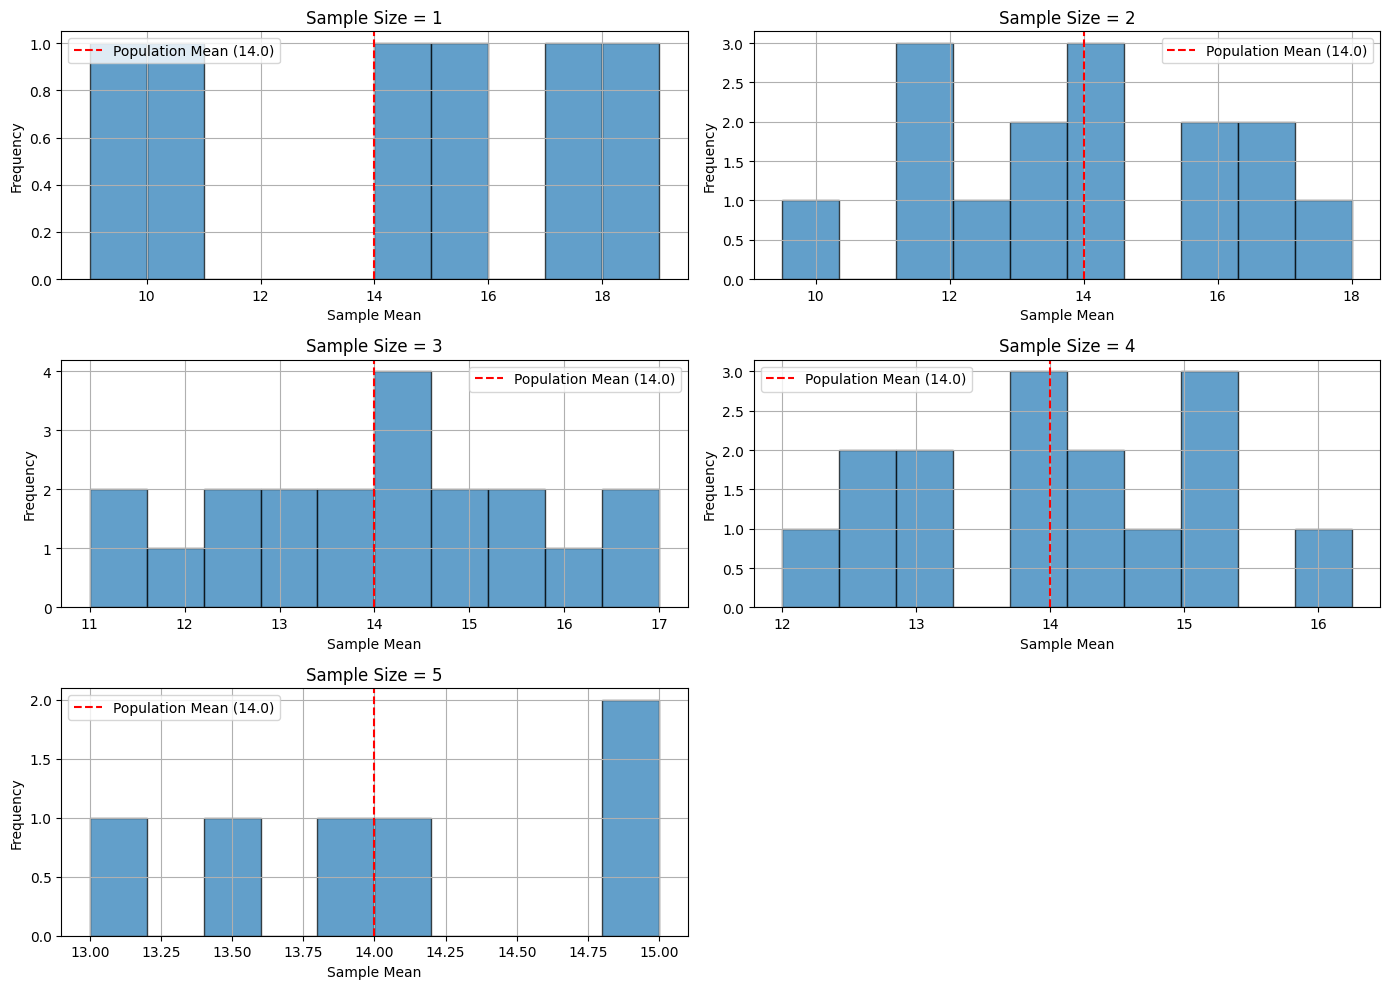

In [12]:
def sample_means(sample_size, data):

    pumpkin_names = list(data.keys())
    weights = np.array(list(data.values()))

    mu = np.mean(weights)

    combs = list(itertools.combinations(pumpkin_names, sample_size))

    x_bar_list = []

    for comb in combs:
        sample_weights = weights[[pumpkin_names.index(name) for name in comb]]
        sample_mean = np.mean(sample_weights)
        x_bar_list.append(sample_mean)

    return combs, x_bar_list, mu

def calculate_probability(means):

    freq = Counter(means)
    total_combinations = len(means)
    prob = {mean: count / total_combinations for mean, count in freq.items()}
    return prob

# Define range of sample sizes
sample_sizes = range(1, 6)

# Set up for plotting
plt.figure(figsize=(14, 10))

for n in sample_sizes:

    combs, means, mu = sample_means(n, pumpkin_dict)

    probs = calculate_probability(means)

    # Plot histogram of sample means
    plt.subplot(3, 2, n)  # 3 rows, 2 columns, nth subplot
    plt.hist(means, bins=10, edgecolor='black', alpha=0.7)
    plt.axvline(mu, color='r', linestyle='--', label=f'Population Mean ({mu:.1f})')
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

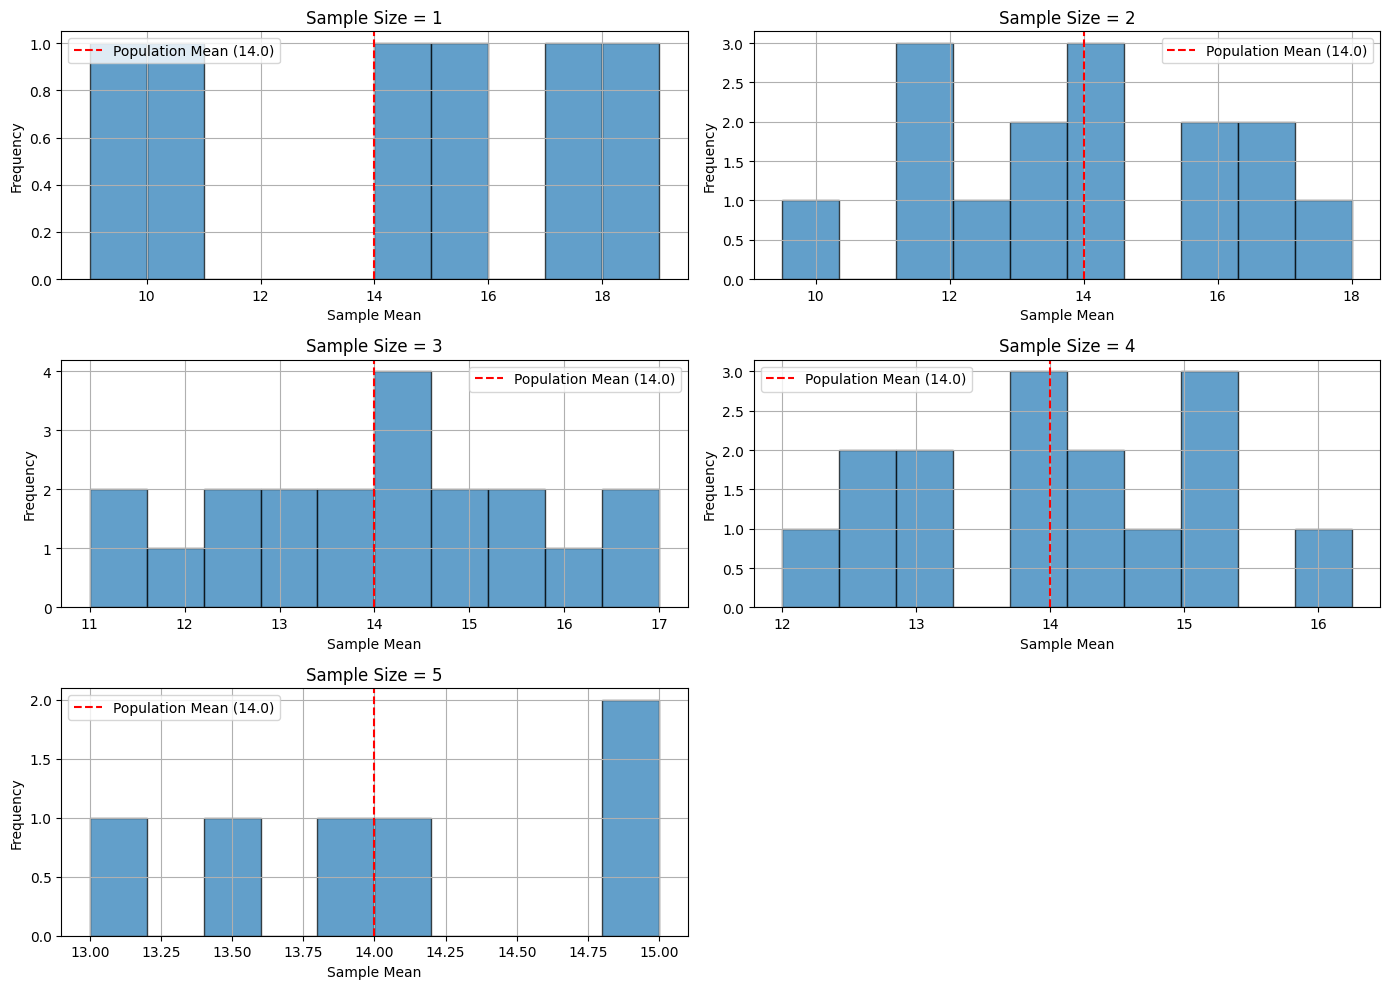

Standard Errors for each sample size:
Sample Size = 1: Standard Error = 3.90
Sample Size = 2: Standard Error = 1.65
Sample Size = 3: Standard Error = 0.94
Sample Size = 4: Standard Error = 0.58
Sample Size = 5: Standard Error = 0.35


In [17]:
def sample_means(sample_size, data):

    pumpkin_names = list(data.keys())
    weights = np.array(list(data.values()))

    mu = np.mean(weights)

    combs = list(itertools.combinations(pumpkin_names, sample_size))

    x_bar_list = []

    for comb in combs:
        sample_weights = weights[[pumpkin_names.index(name) for name in comb]]
        sample_mean = np.mean(sample_weights)
        x_bar_list.append(sample_mean)

    return combs, x_bar_list, mu

def calculate_standard_error(sample_means, sample_size):

    sample_std_dev = np.std(sample_means, ddof=1)
    standard_error = sample_std_dev / np.sqrt(sample_size)
    return standard_error

means_list = []
combs_list = []
err_list = []

sample_sizes = range(1, 6)

# Set up for plotting
plt.figure(figsize=(14, 10))

for n in sample_sizes:

    combs, means, mu = sample_means(n, pumpkin_dict)

    # Calculate standard error
    standard_error = calculate_standard_error(means, n)

    means_list.append(means)
    combs_list.append(combs)
    err_list.append(standard_error)

    plt.subplot(3, 2, n)
    plt.hist(means, bins=10, edgecolor='black', alpha=0.7)
    plt.axvline(mu, color='r', linestyle='--', label=f'Population Mean ({mu:.1f})')
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Print standard error values
print("Standard Errors for each sample size:")
for n, se in zip(sample_sizes, err_list):
    print(f"Sample Size = {n}: Standard Error = {se:.2f}")